# Домашнее задание 1 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [51]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/milhani/Desktop/2008.csv') 

**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [3]:
reasons = {'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}
reason = reasons[df['CancellationCode'].value_counts().idxmax()]

print(f"Самая частая причина отмены рейса — {reason}")

Самая частая причина отмены рейса — carrier


**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [4]:
maximum = df["Distance"].max()
minimum = df["Distance"].min()
mean = df['Distance'].mean()

print(f"Среднее: {mean}\nМинимальное: {minimum}\nМаксимальное: {maximum}")

Среднее: 724.5082571428571
Минимальное: 31
Максимальное: 4962


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [5]:
datum1 = df.loc[df["Distance"] == minimum, ['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum']]
datum2 = df.loc[(df["FlightNum"] == 64) | (df["FlightNum"] == 65), ['Distance']]

print(datum1, datum2, sep="\n")

       Month  DayofMonth  DayOfWeek  FlightNum
1116      12          30          2         65
6958      12          26          5         65
17349      8          18          1         64
27534      3          11          2         64
46082      8           9          6         65
48112      2          28          4         64
       Distance
501         533
1116         31
1389        680
1517        680
2619       2381
...         ...
66529        82
67172       533
68264       386
68338      2454
69305      1005

[78 rows x 1 columns]


**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [6]:
airport = df['Origin'].value_counts().idxmax()

print(f"{airport} — аэропорт Атланты")

ATL — аэропорт Атланты


**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [7]:
meanTime = df.groupby('Origin')['AirTime'].mean().nlargest(1)

print(meanTime)
print()
print(f"Наибольшее значение среднего времени полета у аэропорта SJU")

Origin
SJU    205.2
Name: AirTime, dtype: float64

Наибольшее значение среднего времени полета у аэропорта SJU


**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [37]:
datum3 = df.groupby('Origin').filter(lambda x: len(x) >= 1000)[['Origin', 'DepDelay']]
datum4 = datum3[datum3['DepDelay'] > 0].groupby('Origin').size()
datum5 = datum3.groupby('Origin').size()
datum6 = (datum4 / datum5).idxmax()

print(f"Аэропорт, у которого наибольшая доля задержанных рейсов, - {datum6}")

Аэропорт, у которого наибольшая доля задержанных рейсов, - EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [195]:
data = pd.read_csv('/Users/milhani/Desktop/2008.csv')
print(data)
nullValues = data.isnull().values

if nullValues.any():
    print('Пропущенные значения имеются')
else:
    print('Пропущенные значения не имеются')
    
print("В таблице объект-признак пропущено", nullValues.sum(), "значений")

columnSum = nullValues.sum(axis=1)
nonZeroColumn = [1 for sum in columnSum if sum != 0]
print(f'{sum(nonZeroColumn)} объектов имеют хотя бы один пропуск')

indexSum = nullValues.sum(axis=0)
nonZeroIndex = [1 for sum in indexSum if sum != 0]
print(f'{sum(nonZeroIndex)} признаков имеют хотя бы один пропуск')

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной? Да
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Признаки: Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay не являются информативными, так как в них либо None, либо 0. Их можно исключить из рассмотрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [196]:
attributes = ['Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
              'SecurityDelay', 'LateAircraftDelay']
for attribute in attributes:
    data = data.drop(columns=attribute)
print(data)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... ActualElapsedTime  \
0            2300            W

In [197]:
data = data[(~data['DepDelay'].isnull())]
data = data[(data['DepDelay'] != 0)]

In [198]:
from sklearn.model_selection import train_test_split

y = data["DepDelay"]
X = data.drop(columns=["DepDelay"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [199]:
import math

def getHours(timeval):
    if math.isnan(timeval): 
        return np.nan
    if str(int(timeval))[:-2] == '':
        return 0
    return int(str(int(timeval))[:-2])
    

def getMinutes(timeval):
    if math.isnan(timeval): 
        return np.nan
    return int(str(int(timeval))[:-3:-1][::-1])


def transform(column, data):
    hours = data[column].apply(getHours)
    minutes = data[column].apply(getMinutes)
    data[column + '_Hour'] = hours
    data[column + '_Minute'] = minutes
    return data


data = transform('DepTime', data)
data = transform('CRSDepTime', data)
data = transform('ArrTime', data)
data = transform('CRSArrTime', data)
data = data.drop(columns=['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'])

**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [200]:
data = data.drop(columns=['TailNum', 'Year'])

In [201]:
data = data.drop(columns=['UniqueCarrier', 'Dest', 'Origin']) #убираю строковые данные, чтобы посмотреть корреляцию

In [202]:
data.corr()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
Month,1.000000,-0.004838,-0.010617,0.006598,-0.014230,-0.005765,-0.012840,-0.041950,-0.029528,-0.006289,0.007768,-0.014431,-0.008803,0.002405,-0.006727,0.011477,-0.002887,-0.001491,0.002805,-0.005353
DayofMonth,-0.004838,1.000000,0.015818,0.009847,-0.008110,-0.007024,-0.007842,0.006479,0.008574,-0.007196,-0.002673,-0.002481,0.001605,0.006268,0.002206,-0.000784,-0.001435,-0.006125,0.000708,0.001285
DayOfWeek,-0.010617,0.015818,1.000000,-0.005878,0.010330,0.013325,0.011541,0.002943,0.008530,0.014755,0.001024,-0.005622,0.005866,-0.000551,0.005484,-0.000623,0.005762,-0.000901,0.006235,0.000784
FlightNum,0.006598,0.009847,-0.005878,1.000000,-0.324021,-0.331409,-0.336906,0.027777,0.021166,-0.350380,-0.005973,0.002628,-0.003754,-0.006509,-0.011477,-0.002824,-0.019202,0.001697,-0.031454,0.018267
ActualElapsedTime,-0.014230,-0.008110,0.010330,-0.324021,1.000000,0.979979,0.984401,0.089451,0.041946,0.965089,0.154726,0.264840,-0.017290,0.000991,-0.016923,0.009981,0.033067,0.000021,0.052552,0.005242
CRSElapsedTime,-0.005765,-0.007024,0.013325,-0.331409,0.979979,1.000000,0.988293,0.010358,0.034302,0.983478,0.100990,0.140438,-0.014587,0.001035,-0.011965,0.011929,0.034166,0.002003,0.058308,0.005302
AirTime,-0.012840,-0.007842,0.011541,-0.336906,0.984401,0.988293,1.000000,0.031206,0.025237,0.983222,0.082090,0.105578,-0.023179,0.001006,-0.020695,0.011579,0.026744,0.000545,0.045576,0.002669
ArrDelay,-0.041950,0.006479,0.002943,0.027777,0.089451,0.010358,0.031206,1.000000,0.933526,0.003952,0.117087,0.319716,0.181565,-0.016460,0.119652,0.017466,0.062637,0.002412,0.115969,0.009064
DepDelay,-0.029528,0.008574,0.008530,0.021166,0.041946,0.034302,0.025237,0.933526,1.000000,0.024252,0.020640,0.101294,0.203125,-0.017055,0.140084,0.022437,0.070181,0.006171,0.135561,0.008609
Distance,-0.006289,-0.007196,0.014755,-0.350380,0.965089,0.983478,0.983222,0.003952,0.024252,1.000000,0.072517,0.090600,-0.016906,-0.000497,-0.011925,0.015068,0.024635,0.002774,0.047643,0.005432


In [203]:
data = data.drop(columns=['ArrDelay']) #корреляция аж 0.933526

**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

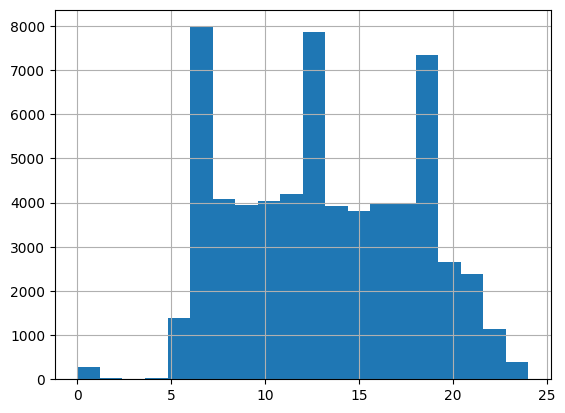

In [114]:
data['DepTime_Hour'].hist(bins=20)

<Axes: >

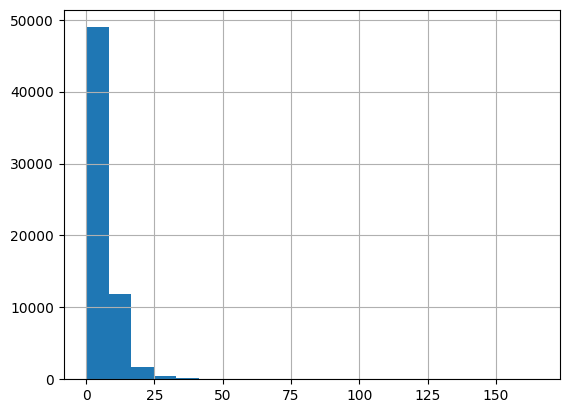

In [115]:
data['TaxiIn'].hist(bins=20)

<Axes: >

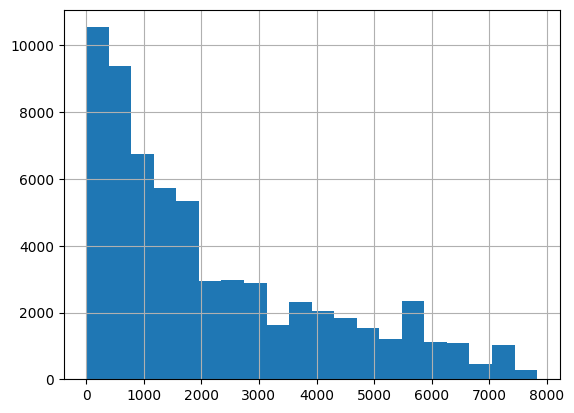

In [116]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [204]:
from sklearn import preprocessing

def transform_data(data):
    dataObjects = (data.dtypes == 'object').values
    for column in data.columns[dataObjects]:
        data[column] = data[column].fillna('nan')
        data[column] = preprocessing.LabelEncoder().fit_transform(data[column])
        
    oneHotEncoder = preprocessing.OneHotEncoder()
    newData = oneHotEncoder.fit_transform(data[data.columns[dataObjects]])
    newData = pd.DataFrame(data=newData)
        
    for column in data.columns[dataObjects]:
        data = data.drop(column)

    dataFloat = (data.dtypes == 'float64').values
    for column in data.columns[dataFloat]:
        data[column] = data[column].fillna(0)
        data[column] = preprocessing.StandardScaler().fit_transform(data[column].values.reshape(-1,1))
    
    return pd.concat([data, newData], axis=1)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [205]:
data = transform_data(data)
X = data
print(X.columns.size, "признаков")

20 признаков


In [206]:
X = X.drop(columns=[0])
print(X)

       Month  DayofMonth  DayOfWeek  FlightNum  ActualElapsedTime  \
0        6.0        18.0        3.0      242.0          -0.988979   
1        6.0         4.0        3.0     2380.0          -0.040552   
2        8.0         3.0        7.0     1769.0           0.157627   
3        1.0        23.0        3.0     3802.0          -0.351976   
4        5.0         4.0        7.0      399.0           0.299183   
...      ...         ...        ...        ...                ...   
63341    NaN         NaN        NaN        NaN                NaN   
63376    NaN         NaN        NaN        NaN                NaN   
63386    NaN         NaN        NaN        NaN                NaN   
63397    NaN         NaN        NaN        NaN                NaN   
63399    NaN         NaN        NaN        NaN                NaN   

       CRSElapsedTime   AirTime  DepDelay  Distance    TaxiIn   TaxiOut  \
0           -0.916826 -0.849307  0.144971     307.0 -0.786908 -0.741204   
1            0.127377

In [207]:
print(y)

0        16.0
1        16.0
2        -2.0
3        -3.0
4        -5.0
         ... 
69994    -5.0
69995   -11.0
69996    24.0
69998     6.0
69999    -1.0
Name: DepDelay, Length: 63404, dtype: float64


In [208]:
additional = pd.DataFrame({
    'DepDelay': [0.0 for i in range(69375-63404)]
})
y = pd.concat([y, additional], axis=0) 
print(y)

      DepDelay
0         16.0
1         16.0
2         -2.0
3         -3.0
4         -5.0
...        ...
5966       0.0
5967       0.0
5968       0.0
5969       0.0
5970       0.0

[69375 rows x 1 columns]


**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [210]:
X

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6.0,18.0,3.0,242.0,-0.988979,-0.916826,-0.849307,0.144971,307.0,-0.786908,-0.741204,21.0,11.0,20.0,55.0,1.663973,-1.234084,23.0,0.0
1,6.0,4.0,3.0,2380.0,-0.040552,0.127377,0.064301,0.144971,834.0,-0.582387,-0.389769,14.0,26.0,14.0,10.0,0.489585,0.034340,17.0,28.0
2,8.0,3.0,7.0,1769.0,0.157627,0.370547,0.314806,-0.354394,997.0,-0.582387,-0.653345,11.0,43.0,11.0,45.0,0.098122,-1.637673,15.0,20.0
3,1.0,23.0,3.0,3802.0,-0.351976,-0.258835,-0.363032,-0.382136,532.0,-0.582387,0.225242,11.0,41.0,11.0,44.0,-0.293341,-0.369249,13.0,35.0
4,5.0,4.0,7.0,399.0,0.299183,0.442068,0.476898,-0.437621,1090.0,-0.582387,-0.741204,8.0,15.0,8.0,20.0,-0.489072,0.783864,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [214]:
from sklearn import linear_model, metrics

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
model = linear_model.LinearRegression().fit(X_train[:1000], y_train[:1000])
trainPrediction = model.predict(X_train[:1000])
testPrediction = model.predict(X_test)

print(metrics.mean_squared_error(y_train[:1000], trainPrediction), metrics.r2_score(y_train[:1000], trainPrediction))
print(metrics.mean_squared_error(y_test, testPrediction), metrics.r2_score(y_test, testPrediction))

0.8116521949533585 0.9992954800402281
1.6365205422130893 0.9985522482526423


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

/usr/local/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+04, tolerance: 5.948e+03
  model = cd_fast.enet_coordinate_descent(


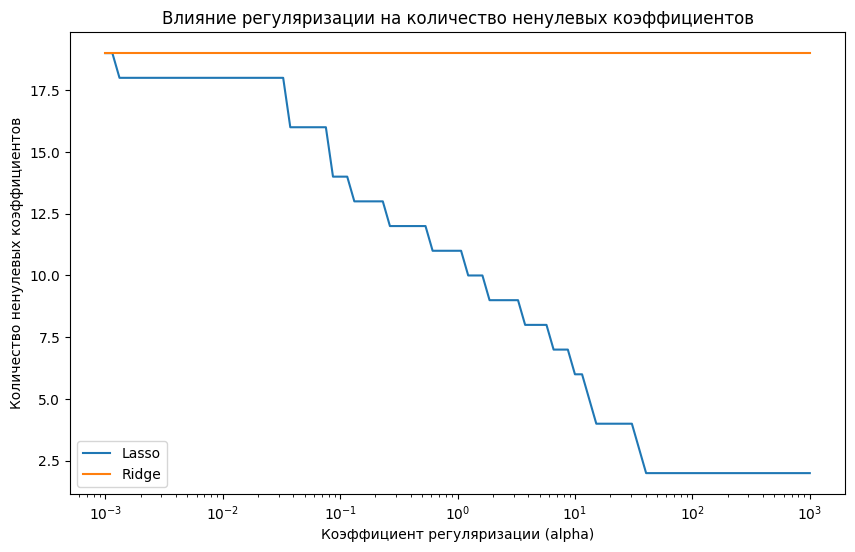

In [215]:
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

alpha_values = np.logspace(-3, 3, 100)
lasso_nonzero_coefs = []
ridge_nonzero_coefs = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_nonzero_coefs.append(np.sum(np.abs(lasso.coef_) > 1e-5))
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_nonzero_coefs.append(np.sum(np.abs(ridge.coef_) > 1e-5))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, lasso_nonzero_coefs, label='Lasso')
plt.plot(alpha_values, ridge_nonzero_coefs, label='Ridge')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Влияние регуляризации на количество ненулевых коэффициентов')
plt.legend()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [216]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 0.9301113886036205
MAE: 0.6658052178799706
R^2: 0.9992346808847119


/usr/local/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучшее alpha для RMSE: 0.7054802310718645
Лучшее alpha для MAE: 0.001
Лучшее alpha для R^2: 0.7054802310718645


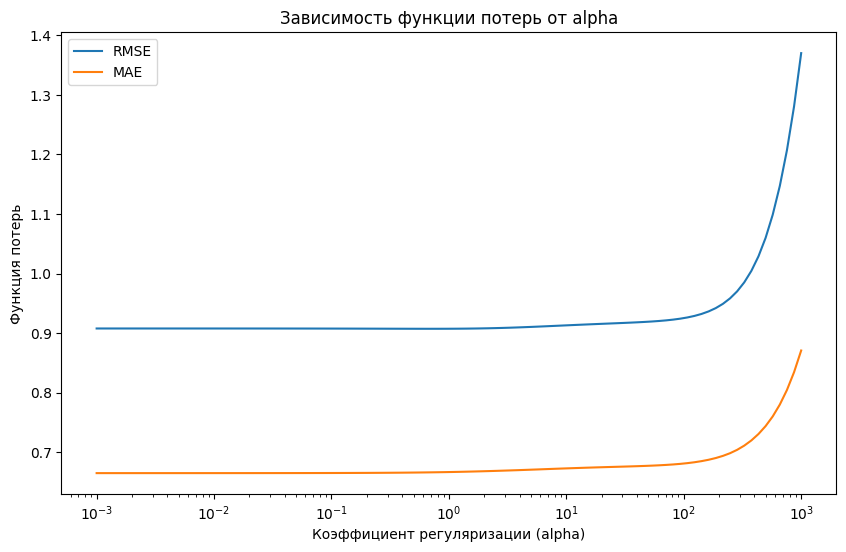

RMSE до настройки: 0.9301113886036205
RMSE после настройки: 0.9331052043789496
MAE до настройки: 0.6658052178799706
MAE после настройки: 0.6648238422160017
R^2 до настройки: 0.9992346808847119
R^2 после настройки: 0.9992297461813371


/usr/local/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [218]:
from sklearn.model_selection import GridSearchCV, KFold

alpha_values = np.logspace(-3, 3, 100)

param_grid = {'alpha': alpha_values}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rmse = GridSearchCV(Ridge(), param_grid, scoring='neg_root_mean_squared_error', cv=cv)
grid_search_rmse.fit(X_train, y_train)

grid_search_mae = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_absolute_error', cv=cv)
grid_search_mae.fit(X_train, y_train)

grid_search_r2 = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=cv)
grid_search_r2.fit(X_train, y_train)

print("Лучшее alpha для RMSE:", grid_search_rmse.best_params_['alpha'])
print("Лучшее alpha для MAE:", grid_search_mae.best_params_['alpha'])
print("Лучшее alpha для R^2:", grid_search_r2.best_params_['alpha'])

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, -grid_search_rmse.cv_results_['mean_test_score'], label='RMSE')
plt.plot(alpha_values, -grid_search_mae.cv_results_['mean_test_score'], label='MAE')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Функция потерь')
plt.title('Зависимость функции потерь от alpha')
plt.legend()
plt.show()

ridge_rmse = Ridge(alpha=grid_search_rmse.best_params_['alpha'])
ridge_rmse.fit(X_train, y_train)
y_pred_rmse = ridge_rmse.predict(X_test)

ridge_mae = Ridge(alpha=grid_search_mae.best_params_['alpha'])
ridge_mae.fit(X_train, y_train)
y_pred_mae = ridge_mae.predict(X_test)

ridge_r2 = Ridge(alpha=grid_search_r2.best_params_['alpha'])
ridge_r2.fit(X_train, y_train)
y_pred_r2 = ridge_r2.predict(X_test)

rmse_tuned = mean_squared_error(y_test, y_pred_rmse, squared=False)
mae_tuned = mean_absolute_error(y_test, y_pred_mae)
r2_tuned = r2_score(y_test, y_pred_r2)

print("RMSE до настройки:", rmse)
print("RMSE после настройки:", rmse_tuned)
print("MAE до настройки:", mae)
print("MAE после настройки:", mae_tuned)
print("R^2 до настройки:", r2)
print("R^2 после настройки:", r2_tuned)

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

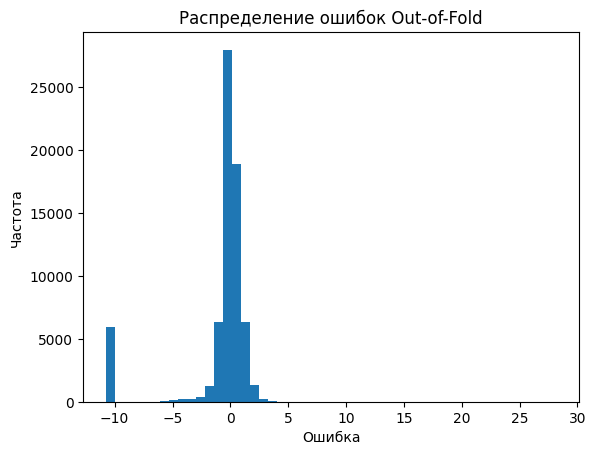

In [221]:
from sklearn.model_selection import cross_val_predict

X = X.fillna(0)

y_pred_oof = cross_val_predict(ridge, X, y, cv=5)

errors = y - y_pred_oof

plt.hist(errors, bins=50)
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок Out-of-Fold')
plt.show()